In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Read data

In [3]:
ovr = pd.read_excel('results/Kraken2_overlaping_sp.xlsx')
bch = pd.read_excel('input/BGI_samplesheet_27-10-2020-Elinile.xlsx')
mrg = ovr.merge(bch, left_on='sample_name', right_on='SampleID', how='inner')

mrg.tail(2)

/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,sample_name,bgi_uniq_perc,shared_perc,ill_uniq_perc,bgi_uniq_numb,shared_numb,ill_uniq_numb,SampleID,Plate,Pos,Conc (ng/ul),Vol (ul),Qty (ug),OD260/280,OD260/230,Kommentaar
1988,VY2X73,19.762739,63.278512,16.958749,733,2347,629,VY2X73,MBbgi-21,D2,97.23,15,1.46,1.54,0.74,NaN
1989,VVIEIZ,23.416370,61.494662,15.088968,658,1728,424,VVIEIZ,MBbgi-04,F11,22.33,30,0.67,2.09,0.81,NaN


In [80]:
ibc = pd.read_excel('input/Metagenome_Illumina_data.xlsx')
ibc

,Sample_Name,Set,Plate,Pos,Vol(ul),Conc(ng/ul),Nucleic Acid ID,Qubit Concentration(ng/ul),Volume(ul),Total amount(ug),Sample QC Results,Sample QC Memo,Nucleic acid hole,Suggestion,Status,duplicates,MMPH/BGI set (yes/no/maybe)
0,V0IY5L,set1,MB-01,A1,25,50,FKDN202388785-1A,12.4035,21.0027,0.26051,Hold,Severe RNA contamination/extra fragments,A02,Go ahead,Waiting for seqencing,NaN,maybe
1,V3TLP0,set1,MB-01,A2,25,100,FKDN202388786-1A,14.4060,21.2525,0.30616,Hold,Severely degraded,A03,Purification,Library preparation,NaN,maybe
2,VN82H4,set1,MB-01,A3,25,98,FKDN202388787-1A,48.8520,21.3695,1.04394,Pass,None,A04,Go ahead,Waiting for seqencing,NaN,yes
3,VZK77E,set1,MB-01,A4,25,75,FKDN202388788-1A,47.8320,21.2191,1.01495,Pass,None,A05,Go ahead,Waiting for seqencing,NaN,yes
4,VKOABJ,set1,MB-01,A5,25,37,FKDN202388789-1A,16.4835,23.2861,0.38384,Pass,None,A06,Go ahead,Waiting for seqencing,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,VC5KZS,set2,MB-28,D1,50,23,FKDN202452601-1A,20.0970,46.2840,0.93017,Pass,None,NaN,Library preparation,waiting for feedback,NaN,yes
2533,V2Y99F,set2,MB-28,E1,50,12,FKDN202452602-1A,7.8060,45.5966,0.35593,Pass,None,NaN,Library preparation,waiting for feedback,NaN,yes
2534,VY8V5H,set2,MB-28,F1,50,14,FKDN202452603-1A,15.8310,47.6493,0.75434,Pass,None,NaN,Library preparation,waiting for feedback,NaN,yes
2535,V26Z1X,set2,MB-28,G1,50,17,FKDN202452604-1A,8.6700,41.2073,0.35727,Pass,None,NaN,Library preparation,waiting for feedback,NaN,yes


In [40]:
mrg_sorted = mrg.sort_values(by='Plate')
plate_counts = mrg_sorted['Plate'].value_counts(sort=False)
plate_counts = plate_counts.to_frame().reset_index()
plate_counts['cumulative'] = plate_counts['Plate'].cumsum()

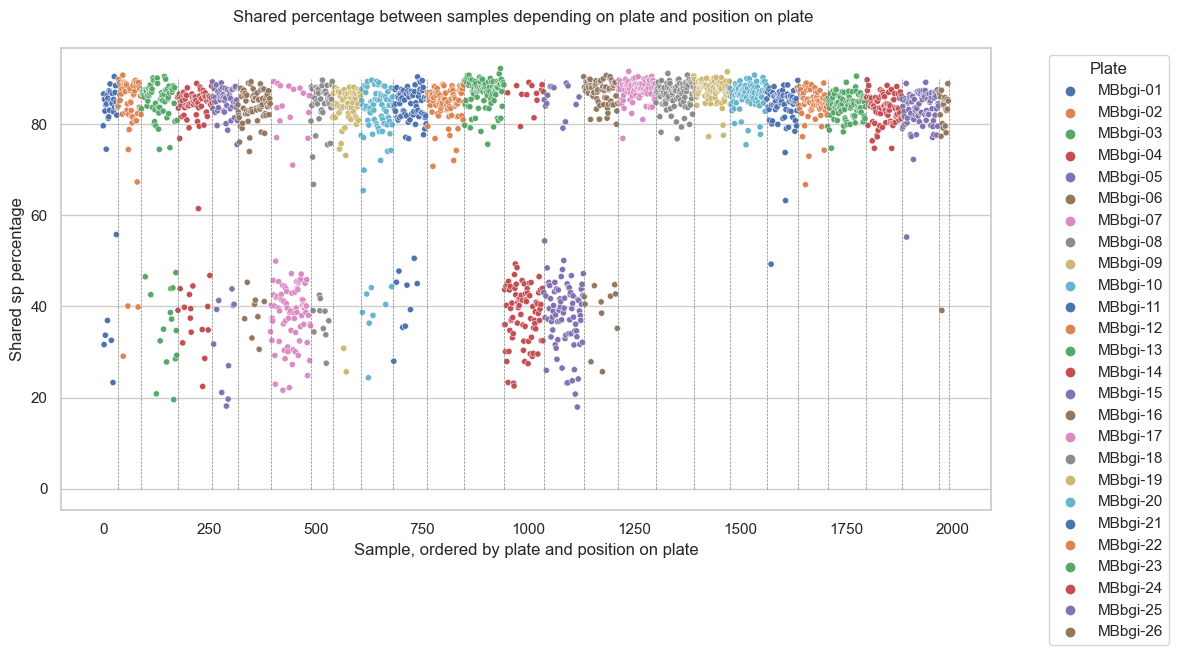

In [74]:
mrg = mrg.sort_values(by='Pos').reset_index(drop=True)
mrg = mrg.sort_values(by='Plate').reset_index(drop=True)
plate_counts = mrg_sorted['Plate'].value_counts(sort=False)
plate_counts = plate_counts.to_frame().reset_index()
plate_counts['cumulative'] = plate_counts['Plate'].cumsum()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=mrg, x=mrg.index, y="shared_perc", hue="Plate", palette="deep", s=20)
plt.ylabel('Shared sp percentage')
plt.xlabel('Sample, ordered by plate and position on plate')
#plt.xticks('')
plt.title('Shared percentage between samples depending on plate and position on plate \n')
# 2 columns legend
plt.legend(title='Plate', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(axis='x')
plt.vlines(plate_counts['cumulative'], 0, 90, colors='grey', linestyles='dashed', linewidth=0.5)

plt.savefig('results/Shared_percentage_Plates.png', dpi=300, bbox_inches='tight')


In [ ]:
mrg['conc_type'] = np.where(mrg['Plate'].isin(['MBbgi-07', 'MBbgi-14', 'MBbgi-15']), 'bad', 'good')

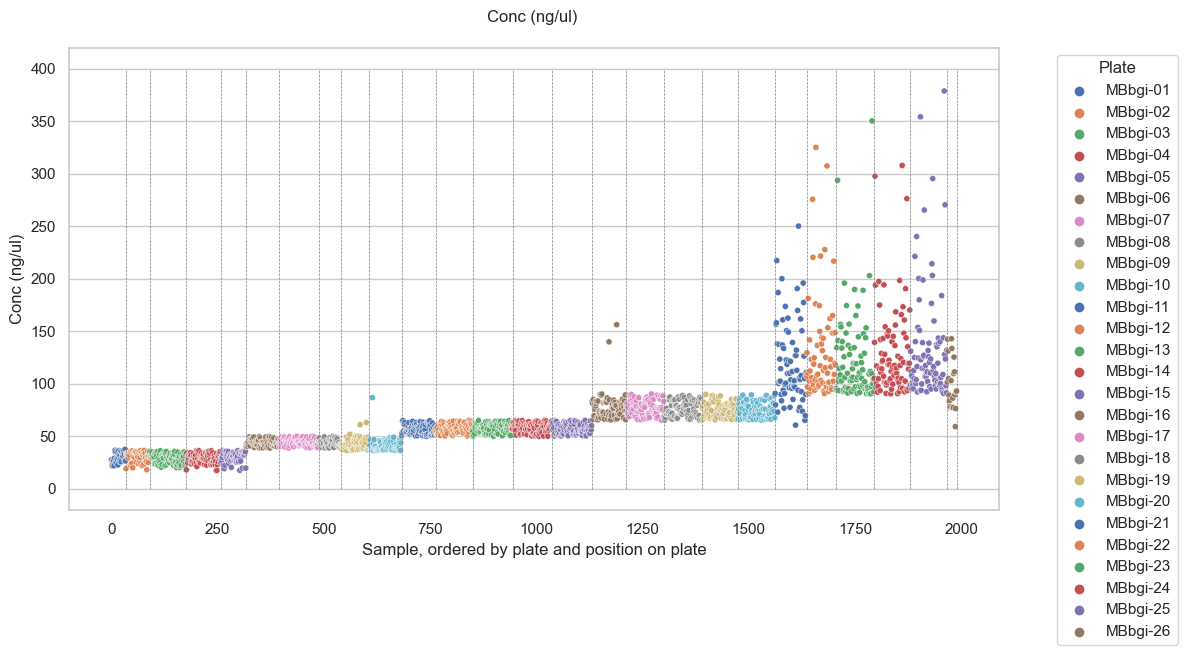

In [75]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=mrg, x=mrg.index, y="Conc (ng/ul)", hue="Plate", palette="deep", s=20)

plt.xlabel('Sample, ordered by plate and position on plate')
#plt.xticks('')
plt.title('Conc (ng/ul) \n')
# 2 columns legend
plt.legend(title='Plate', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(axis='x')
plt.vlines(plate_counts['cumulative'], 0, 400, colors='grey', linestyles='dashed', linewidth=0.5)

plt.savefig('results/Conc_Plates.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='Plate'>

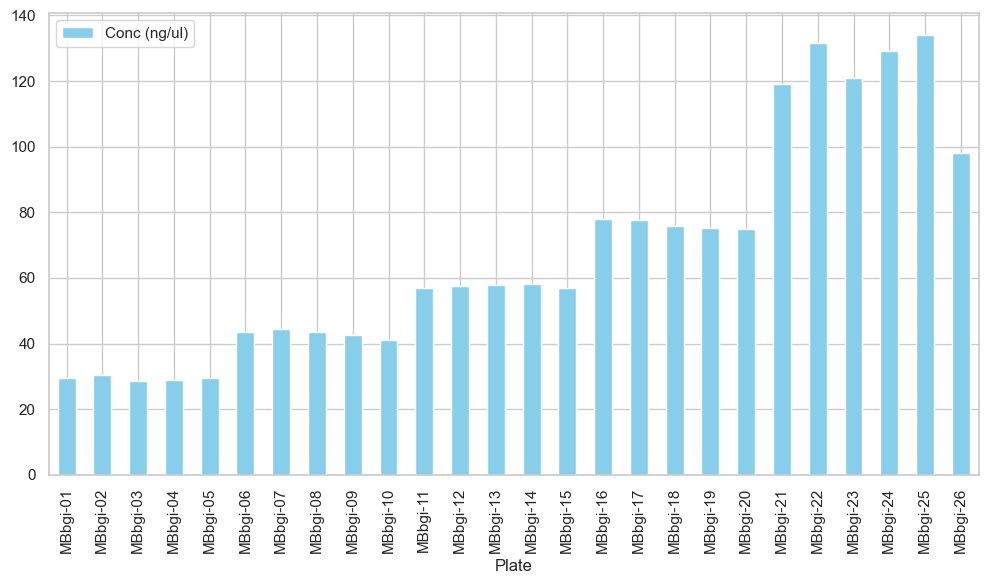

In [73]:
# mean Conc (ng/ul) per plate
mean_conc = mrg.groupby('Plate')['Conc (ng/ul)'].mean().reset_index()
mean_conc.plot(kind='bar', x='Plate', y='Conc (ng/ul)', color='skyblue', figsize=(12, 6))

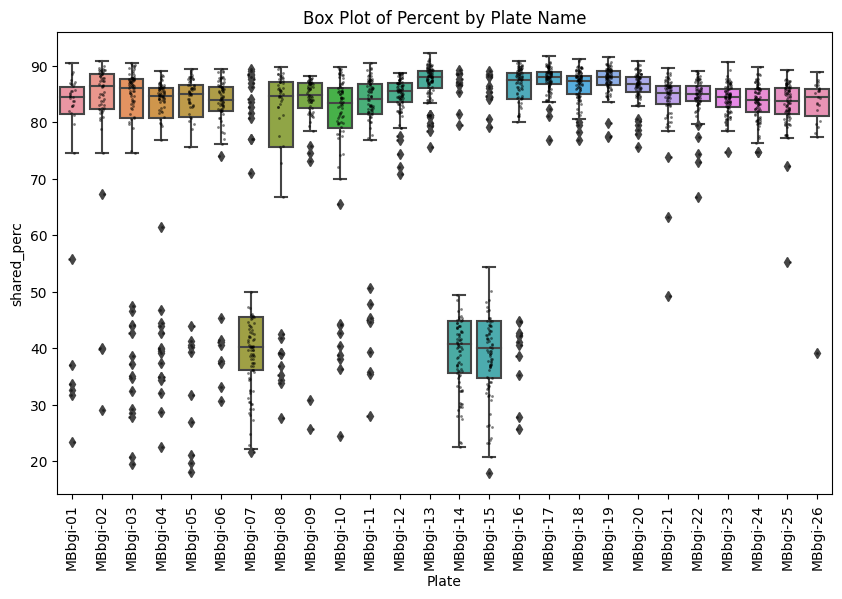

                 sum_sq      df          F         PR(>F)
C(Plate)  362775.699897    25.0  92.866402  2.958353e-310
Residual  306888.803476  1964.0        NaN            NaN


In [22]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# sort data
mrg = mrg.sort_values(by='Plate').reset_index(drop=True)

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Plate', y='shared_perc', data=mrg)
sns.stripplot(x='Plate', y='shared_perc', data=mrg, color='black', alpha=0.5, jitter=True, size=2)
plt.xticks(rotation=90)
plt.title('Box Plot of Percent by Plate Name')
plt.show()



# ANOVA
model = ols('shared_perc ~ C(Plate)', data=mrg).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


Oserved significant differences between the groups

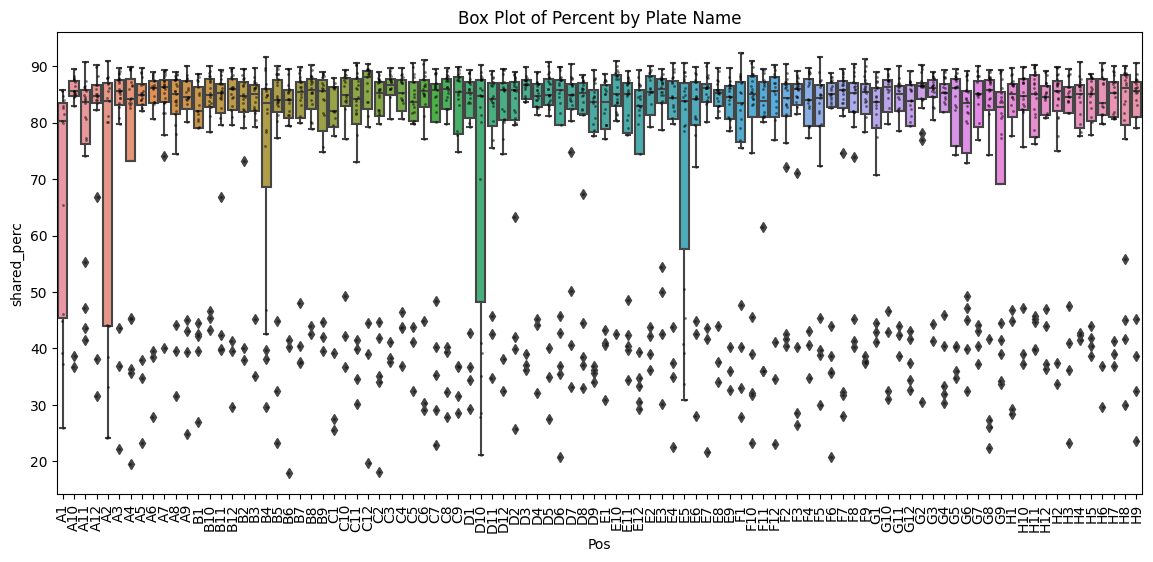

In [32]:
# sort data
mrg = mrg.sort_values(by='Pos').reset_index(drop=True)

# Box Plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Pos', y='shared_perc', data=mrg)
sns.stripplot(x='Pos', y='shared_perc', data=mrg, color='black', alpha=0.5, jitter=True, size=2)
plt.xticks(rotation=90)
plt.title('Box Plot of Percent by Plate Name')
plt.show()

In [59]:
mrg
# add new column with 'bad' for Plate MBbgi-07, MBbgi-14, MBbgi-15 and 'good' for the rest
mrg['plate_type'] = np.where(mrg['Plate'].isin(['MBbgi-07', 'MBbgi-14', 'MBbgi-15']), 'bad', 'good')
mrg

,sample_name,bgi_uniq_perc,shared_perc,ill_uniq_perc,bgi_uniq_numb,shared_numb,ill_uniq_numb,SampleID,Plate,Pos,Conc (ng/ul),Vol (ul),Qty (ug),OD260/280,OD260/230,Kommentaar,plate_type
0,VWIFK7,13.937166,80.013369,6.049465,417,2394,181,VWIFK7,MBbgi-11,A1,60.83,20,1.22,1.88,3.10,NaN,good
1,VNOCNL,7.666099,84.667802,7.666099,180,1988,180,VNOCNL,MBbgi-22,A1,123.10,15,1.85,1.65,2.02,NaN,good
2,V8417B,56.031390,25.964126,18.004484,2499,1158,803,V8417B,MBbgi-15,A1,52.17,20,1.04,1.69,8.57,NaN,bad
3,VG40EF,11.435973,82.568468,5.995559,309,2231,162,VG40EF,MBbgi-09,A1,46.10,20,0.92,1.77,-0.67,NaN,good
4,V8X023,7.742664,85.733634,6.523702,343,3798,289,V8X023,MBbgi-04,A1,27.20,30,0.82,1.70,1.70,NaN,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,VM2ETE,12.599522,78.960987,8.439490,633,3967,424,VM2ETE,MBbgi-12,H9,57.40,20,1.15,1.71,1.94,NaN,good
1986,VOE87W,5.869324,90.531561,3.599114,212,3270,130,VOE87W,MBbgi-01,H9,31.40,30,0.94,1.80,2.13,NaN,good
1987,VOFI2M,6.372107,80.943793,12.684100,212,2693,422,VOFI2M,MBbgi-02,H9,34.90,30,1.05,2.22,0.82,NaN,good
1988,VC0JIV,6.052009,87.517730,6.430260,128,1851,136,VC0JIV,MBbgi-13,H9,62.21,20,1.24,2.10,1.65,NaN,good


Text(0.5, 1.0, 'Scatter Plot of shared_perc vs Conc (ng/ul)')

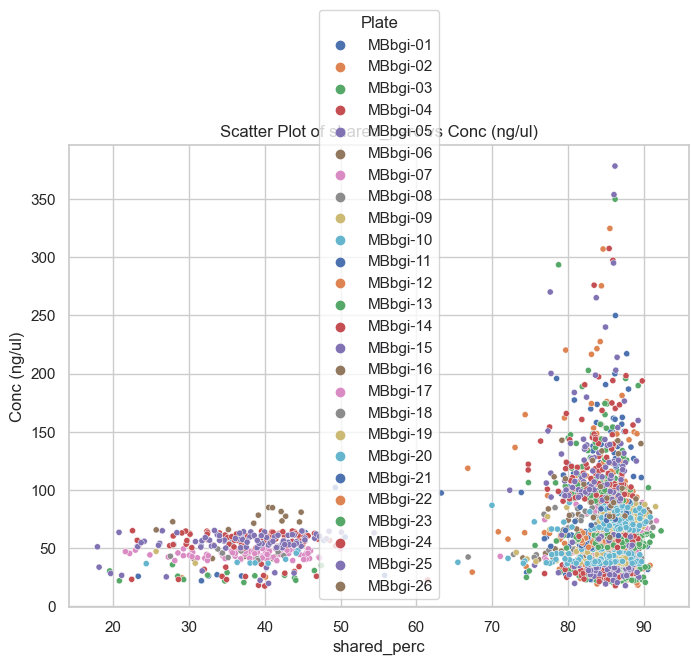

In [65]:
plt.figure(figsize=(8, 6))

#plt.scatter(mrg['shared_perc'], mrg['Conc (ng/ul)'], alpha=0.3, color='brown')
sns.scatterplot(data=mrg, x='shared_perc', y='Conc (ng/ul)', hue='Plate', palette='deep', s=20)
plt.xlabel('shared_perc')
plt.ylabel('Conc (ng/ul)')
plt.title('Scatter Plot of shared_perc vs Conc (ng/ul)')

In [26]:
# Post-Hoc Test (Tukey's HSD)
posthoc = pairwise_tukeyhsd(mrg['shared_perc'], mrg['Plate'], alpha=0.05)
df = pd.DataFrame(data=posthoc._results_table.data[1:], columns=posthoc._results_table.data[0])
df


,group1,group2,meandiff,p-adj,lower,upper,reject
0,MBbgi-01,MBbgi-02,6.7297,0.7324,-3.2797,16.7391,False
1,MBbgi-01,MBbgi-03,0.8423,1.0000,-8.4998,10.1843,False
2,MBbgi-01,MBbgi-04,-0.1575,1.0000,-9.5483,9.2333,False
3,MBbgi-01,MBbgi-05,0.2613,1.0000,-9.6212,10.1438,False
4,MBbgi-01,MBbgi-06,3.4453,0.9999,-6.0344,12.9250,False
...,...,...,...,...,...,...,...
320,MBbgi-23,MBbgi-25,-0.8819,1.0000,-7.8038,6.0399,False
321,MBbgi-23,MBbgi-26,-2.1231,1.0000,-12.8797,8.6334,False
322,MBbgi-24,MBbgi-25,-0.3489,1.0000,-7.3702,6.6723,False
323,MBbgi-24,MBbgi-26,-1.5901,1.0000,-12.4109,9.2306,False


MBbgi-01 has significant differences with MBbgi-07, MBbgi-13, MBbgi-14, MBbgi-15, MBbgi-17, MBbgi-18, MBbgi-19, and MBbgi-20.
MBbgi-07 shows significant differences with many other groups (e.g., MBbgi-08 to MBbgi-26).
MBbgi-13, MBbgi-14, MBbgi-15, MBbgi-17, MBbgi-18, MBbgi-19, and MBbgi-20 frequently exhibit significant differences when compared to other groups.

In [28]:
# Find groups with significantly smaller percentages
# A positive "meandiff" indicates that the mean of group2 is higher than the mean of group1.
smaller_groups = df[(df['reject'] == True) & (df['meandiff'] > 0)]
smaller_groups['group1'].unique()


array(['MBbgi-01', 'MBbgi-03', 'MBbgi-04', 'MBbgi-05', 'MBbgi-06',
       'MBbgi-07', 'MBbgi-08', 'MBbgi-10', 'MBbgi-11', 'MBbgi-14',
       'MBbgi-15', 'MBbgi-16'], dtype=object)

In [29]:
# Find groups with significantly higher percentages
# A positive "meandiff" indicates that the mean of group2 is smaller than the mean of group1.
smaller_groups = df[(df['reject'] == True) & (df['meandiff'] < 0)]
smaller_groups['group1'].unique()

array(['MBbgi-01', 'MBbgi-02', 'MBbgi-03', 'MBbgi-04', 'MBbgi-05',
       'MBbgi-06', 'MBbgi-08', 'MBbgi-09', 'MBbgi-10', 'MBbgi-11',
       'MBbgi-12', 'MBbgi-13'], dtype=object)